# Using the Custom Hardware Image Generator

This notebook demonstrates hardware generation of an image stream and displaying it on the HDMI output. Before running it you will need to compile the example overlay with the frame generator in Verilog. Two files are generated:
- a `.bit` file, containing the FPGA configuration bitstream
- a `.hwh` (hardware handoff) file, containing information about the module heirarchy and memory map

Copy both files to the user home directory on the Pynq operating system. Then load them (loading the `.bit` also reads the `.hwh` of the same name):

In [1]:
from pynq import Overlay
from pynq.lib.video import *

overlay = Overlay("/home/xilinx/omega_thread.bit")

The overlay object is automatically configured with a Python attribute structure that allows you to access the hardware as Python objects. Appropriate driver classes are instantiated where a hardware block is recognised by the Pynq library. Here we get a convenient handle to the VDMA connected to the image generator:

In [2]:
#overlay?

In [3]:
imgen_vdma = overlay.video.axi_vdma_0.readchannel

Next, the image generator DMA is configured and started:

In [4]:
videoMode = common.VideoMode(1280, 720, 24) #changed
imgen_vdma.mode = videoMode
imgen_vdma.start()
hdmi_out = overlay.video.hdmi_out
hdmi_out._vdma = overlay.video.axi_vdma #Use the correct VDMA!
hdmi_out.configure(videoMode)
hdmi_out.start()

Send instructions to the GPU

In [5]:
import time



# Send instructions using CPU-GPU control signals
def send_instructions(instructions):
    overlay.video.axi_gpio_0.channel1.write(instructions[0], 0xffffffff)
    while (overlay.video.axi_gpio_1.channel1.read() != 0b10):
        time.sleep(1)  

    for i in range(1, len(instructions)):
        overlay.video.axi_gpio_0.channel1.write(0xa8000000, 0xffffffff)
        while (overlay.video.axi_gpio_1.channel1.read() != 0b11):
            time.sleep(1)

        overlay.video.axi_gpio_0.channel1.write(instructions[i], 0xffffffff)
        while (overlay.video.axi_gpio_1.channel1.read() != 0b10):
            time.sleep(1)        

    overlay.video.axi_gpio_0.channel1.write(0xb0000000, 0xffffffff)
    while (overlay.video.axi_gpio_1.channel1.read() != 0b01):
        time.sleep(1)      


def send_programs(program_list):
    for program in program_list:
        send_instructions(program)
        while (overlay.video.axi_gpio_1.channel1.read() != 0b00):
            time.sleep(0.001) 

program0 = [
    0xa0008000,
    0x20000004,
    0x2001a825,
    0x000180a5,
    0x800204a0,
    0xe0001c00
]

program1 = [
    0xa1008000,
    0x2001a825,
    0x000180a5,
    0x20ff9ca4,
    0x60004084,
    0x4452fe06,
    0x60030484,
    0x439c7e46,
    0x60030884,
    0x4c147c06,
    0x60030084,
    0x2004aca6,
    0x210004c6,
    0x00030406,
    0x600040c6,
    0x4452fe07,
    0x600384c6,
    0x439c7e47,
    0x600388c6,
    0x4c147c07,
    0x600380c6,
    0x60030086,
    0x20ff9ca4,
    0x60004084,
    0x4452fe07,
    0x60038484,
    0x439c7e47,
    0x60038884,
    0x4c147c07,
    0x60038084,
    0x2004aca7,
    0x210004e7,
    0x00038407,
    0x600040e7,
    0x4452fe08,
    0x600404e7,
    0x439c7e48,
    0x600408e7,
    0x4c147c08,
    0x600400e7,
    0x44147c08,
    0x4c147c09,
    0x60047080,
    0x70027120,
    0x54147c08,
    0x5c147c09,
    0x700470e0,
    0x7003f120,
    0x54147c08,
    0x5c147c09,
    0x700470c0,
    0x70037120,
    0x53f07c0a,
    0x70050888,
    0x50007c0a,
    0x700508e9,
    0x70048108,
    0x50007c0a,
    0x700508c9,
    0x70048108,
    0x50007c0b,
    0x7005888a,
    0x53f07c0b,
    0x700588e9,
    0x7004814a,
    0x50007c0b,
    0x700588c9,
    0x7004814a,
    0x58007c05,
    0x7002888b,
    0x50007c05,
    0x700288e9,
    0x7004816b,
    0x53f07c05,
    0x700288c9,
    0x7004816b,
    0x20010006,
    0x30000006,
    0x20000165,
    0x43f07c04,
    0x60021104,
    0x60001947,
    0x43a1ff69,
    0x6004f0e0,
    0x58007c07,
    0x70038884,
    0x53a1ff67,
    0x70038084,
    0x70027160,
    0x5c147c05,
    0x43f07c09,
    0x60049149,
    0x60001907,
    0x43a1ff64,
    0x600270e0,
    0x50007c07,
    0x70038929,
    0x53a1ff67,
    0x70038129,
    0x7004f160,
    0x5c147c05,
    0x60001907,
    0x43a1ff69,
    0x6004f0e0,
    0x70001947,
    0x53a1ff69,
    0x7004f0e0,
    0x5c147c05,
    0x200000ab,
    0x2000f0c0,
    0x5c147c05,
    0x7002856b,
    0x53b9fcc5,
    0x7002896b,
    0x50007c05,
    0x7002816b,
    0x5c147c04,
    0x70020508,
    0x54427cc4,
    0x70020908,
    0x5452fe04,
    0x70020108,
    0x5c147c04,
    0x7002054a,
    0x54427cc4,
    0x7002094a,
    0x5452fe04,
    0x7002014a,
    0x70004508,
    0x7000454a,
    0x3100054a,
    0x1005040a,
    0x3004a945,
    0x100400a5,
    0x70004d6b,
    0x90058ca0,
    0xe0001c00
]

program2 = [
    0xa2004100,
    0x20000004,
    0xc0000080,
    0xe0001c00
]

program3 = [
    0xa3002000,
    0x20000004,
    0xc0000080,
    0xc0000080,
    0xc0000080,
    0x20079c26,
    0x2001a8c6,
    0x000180c6,
    0x20022c25,
    0x2004a8a5,
    0x000300a5,
    0x800000a7,
    0x20010008,
    0x30000008,
    0x20000009,
    0x0004f4e0,
    0x300084aa,
    0x90000147,
    0x1004f4e0,
    0x3100054a,
    0x90000147,
    0x1004f4e0,
    0x3000814a,
    0x90000147,
    0x2000f100,
    0xc00000e0,
    0x204000a5,
    0x800000a7,
    0x2001000a,
    0x3000000a,
    0x20000009,
    0x0004f4e0,
    0x300084a8,
    0x90000107,
    0x1004f4e0,
    0x31000508,
    0x90000107,
    0x1004f4e0,
    0x30008108,
    0x90000107,
    0x2000f140,
    0xc00000e0,
    0x204000a5,
    0x800000a7,
    0x20010008,
    0x30000008,
    0x20000009,
    0x0004f4e0,
    0x300084aa,
    0x90000147,
    0x1004f4e0,
    0x3100054a,
    0x90000147,
    0x1004f4e0,
    0x3000814a,
    0x90000147,
    0x2000f100,
    0xc00000e0,
    0x204000a5,
    0x800000a7,
    0x2001000a,
    0x3000000a,
    0x20000009,
    0x0004f4e0,
    0x300084a8,
    0x90000107,
    0x1004f4e0,
    0x31000508,
    0x90000107,
    0x1004f4e0,
    0x30008108,
    0x90000107,
    0x2000f140,
    0xc00000e0,
    0xc0000080,
    0xc0000080,
    0xc0000080,
    0xe0001c00
]

program4 = [
    0xa4004100,
    0x20000004,
    0xc0000080,
    0xe0001c00
]

program_list = [program0, program1, program2, program3, program4]



import time
import threading

# def send_frames():
#     while True:
#         print("sent prog")
#         time.sleep(0.5)
#         send_programs(program_list)
#         time.sleep(0.5)

      


# send_frames_thread = threading.Thread(target = send_frames, daemon=True)
# send_frames_thread.start()


# while True:
#     print("frame")
#     time.sleep(0.5)
#     frame = imgen_vdma.readframe()
#     time.sleep(0.5)
#     print("in the middle")
#     hdmi_out.writeframe(frame)
#     time.sleep(0.5)
#     print("finished frame")

send_programs(program_list)
send_programs(program_list)
send_programs(program_list)
send_programs(program_list)
send_programs(program_list)
    
for _ in range(10):    
    send_programs(program_list)
    time.sleep(0.1)
    frame = imgen_vdma.readframe()
    hdmi_out.writeframe(frame)
    print("done")


    



done
done
done
done
done
done
done
done
done
done


The VDMA continuously reads frames into a cycle of memory buffers. You can take software ownership of a frame and get a NumPy handle for it:

In [ ]:
frame = imgen_vdma.readframe()

The frame can be displayed in the notebook using PiL:

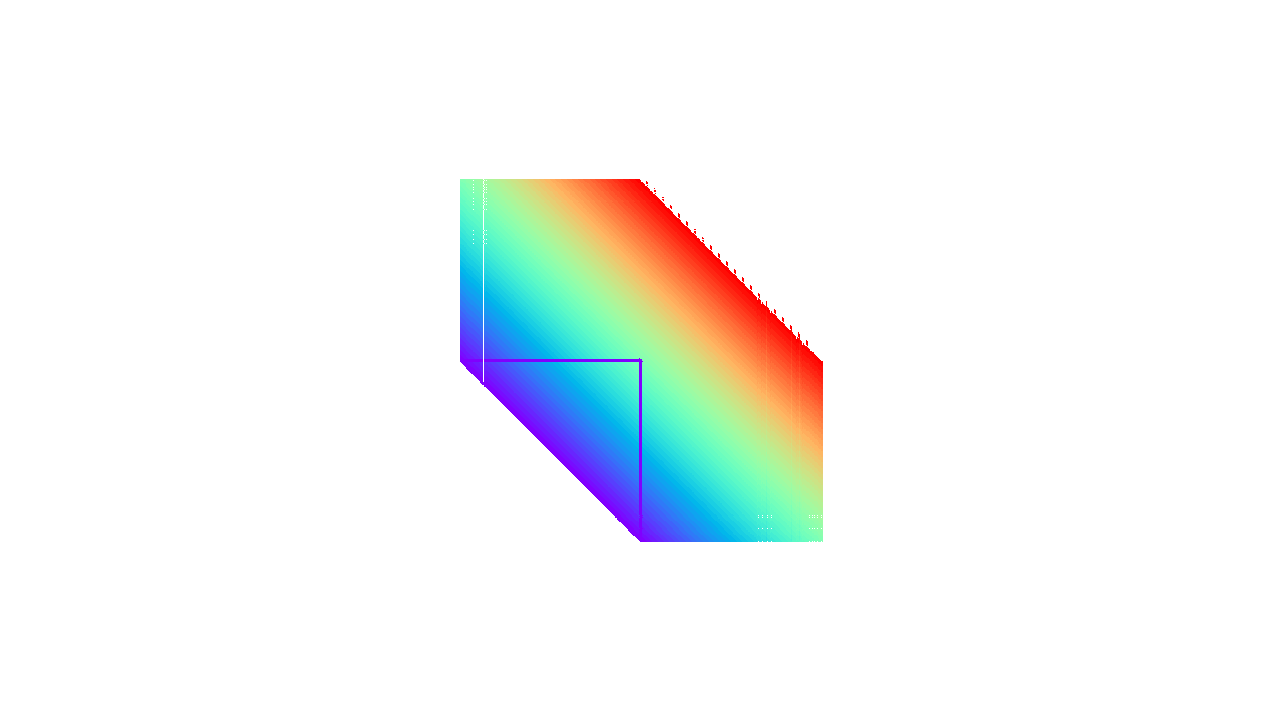

In [6]:
import PIL.Image

image = PIL.Image.fromarray(frame)
image

Finally, stop the VDMAs so that the system is in a stable state at the end of the notebook

In [5]:
hdmi_out = overlay.video.hdmi_out
hdmi_out._vdma = overlay.video.axi_vdma #Use the correct VDMA!
hdmi_out.configure(videoMode)
hdmi_out.start()

In [22]:
hdmi_out.writeframe(frame)

In [18]:
# imgen_vdma.stop()
hdmi_out.close()